Ноутбук для проверки данных. Кажется работает. Проверяется что они перемешались как надо и данные сохранились после всех процедур предобработки

In [1]:
import h5py as h5
import numpy as np
import os
import matplotlib.pyplot as plt
data_path = '/home/rfit/Telescope_Array/phd_work/data/normed/pr_q4_14yr_e1_0110_excl_sat_F_excl_geo_F.h5'


In [2]:
with h5.File(data_path,'r') as f:
    print('keys', list(f.keys()))
    train = f['train']
    print(list(train.keys()))
    print(train['ev_starts'][()])
    print(train['ev_ids'][()])
    print(train['dt_params'])
    
    norm_param = f['norm_param']['dt_params']
    norm_param_std = norm_param['std'][()]
    norm_param_mean = norm_param['mean'][()]
    ev_starts_data = train['ev_starts'][()] 
    dt_params_data = train['dt_params'][()]
    ev_ids_data = train['ev_ids'][()]

keys ['norm_param', 'test', 'train', 'val']
['dt_bundle', 'dt_mask', 'dt_params', 'ev_ids', 'ev_starts', 'mc_params', 'recos', 'wfs_flat']
[        0        43        73 ... 111191147 111191169 111191190]
[[2.01007100e+07 1.44307856e+05 1.00000000e+00]
 [2.01307080e+07 6.53368413e+04 1.00000000e+00]
 [2.02112110e+07 2.55049578e+04 1.00000000e+00]
 ...
 [2.02112150e+07 5.43070790e+04 1.00000000e+00]
 [2.02008070e+07 2.48500224e+02 1.00000000e+00]
 [2.02004250e+07 1.93619781e+05 1.00000000e+00]]
<HDF5 dataset "dt_params": shape (111191190, 6), type "<f4">


In [3]:
ev_ids_data.shape, ev_starts_data.shape, dt_params_data.shape

((4498159, 3), (4498160,), (111191190, 6))

In [4]:
# init h5
h5_init = '/home/rfit/Telescope_Array/phd_work/data/h5s/pr_q4_14yr_e1.h5'
with h5.File(h5_init,'r') as init:
    print('keys', list(init.keys()))
    ev_ids = init['ev_ids'][()]
    ev_starts =  init['ev_starts'][()]
    dt_params = init['dt_params'][()]
#     train = f['train']
#     print(list(train.keys()))
#     print(train['ev_starts'][()])
#     print(train['ev_ids'][()])
#     print(train['dt_params'])

keys ['bdt_params', 'dt_ids', 'dt_mask', 'dt_params', 'dt_wfs', 'ev_ids', 'ev_starts', 'mc_params', 'pass_cuts', 'reco_ivanov', 'reco_ivanov_error', 'reco_ivanov_params', 'reco_rubtsov', 'reco_rubtsov_params']


In [5]:
ev_starts_data, ev_starts

(array([        0,        43,        73, ..., 111191147, 111191169,
        111191190]),
 array([        0,         5,        10, ..., 292474610, 292474614,
        292474618]))

In [6]:
ev_ids_data

array([[2.01007100e+07, 1.44307856e+05, 1.00000000e+00],
       [2.01307080e+07, 6.53368413e+04, 1.00000000e+00],
       [2.02112110e+07, 2.55049578e+04, 1.00000000e+00],
       ...,
       [2.02112150e+07, 5.43070790e+04, 1.00000000e+00],
       [2.02008070e+07, 2.48500224e+02, 1.00000000e+00],
       [2.02004250e+07, 1.93619781e+05, 1.00000000e+00]])

In [7]:
first = ev_ids_data[3]
ev_ids

array([[2.00805210e+07, 1.34811280e+05, 1.00000000e+00],
       [2.00805210e+07, 2.04537317e+05, 1.00000000e+00],
       [2.00805230e+07, 3.20376600e+04, 1.00000000e+00],
       ...,
       [2.01204300e+07, 1.60430488e+05, 1.00000000e+00],
       [2.01208280e+07, 7.26183160e+04, 1.00000000e+00],
       [2.01310030e+07, 3.36444625e+04, 1.00000000e+00]])

In [8]:
# from tqdm import tqdm
num_data = 30
first = ev_ids_data[num_data]
for j,i in enumerate(ev_ids[:]):
    if (i==first).all():
        print(j)
        num = j

3525261


In [25]:
first, ev_ids[num]

(array([2.01009190e+07, 2.15347174e+05, 1.00000000e+00]),
 array([2.01009190e+07, 2.15347174e+05, 1.00000000e+00]))

In [26]:
np.diff(ev_starts[num:num+2])

array([17])

In [27]:
np.diff(ev_starts_data[num_data: num_data+2])

array([17])

In [28]:
ev_starts[num:num+2]

array([69080673, 69080690])

In [29]:
data = dt_params[ev_starts[num]: ev_starts[num+1]]
data.shape

(17, 6)

In [30]:
ev_data = dt_params_data[ev_starts_data[num_data]: ev_starts_data[num_data+1]]
ev_data = ev_data*norm_param_std + norm_param_mean
ev_data.shape

(17, 6)

In [31]:
data.shape, ev_data.shape

((17, 6), (17, 6))

In [32]:
# data.sort()
data

array([[-9.81914e-01,  1.47374e+00,  4.89662e-03,  1.62334e+00,
        -4.37700e+00,  1.33800e+00],
       [-1.97694e+00,  4.78154e-01,  3.56517e-03,  6.08723e-01,
        -3.98200e+00,  1.80200e+00],
       [ 2.31840e-02,  1.47471e+00,  3.14739e-03,  2.37546e+00,
        -2.82500e+00,  1.50600e+00],
       [-9.83909e-01,  4.77106e-01,  3.90856e-03,  9.69611e+00,
        -2.45100e+00,  6.31000e-01],
       [-9.83909e-01,  4.77106e-01,  3.90856e-03,  9.69611e+00,
        -2.45100e+00,  3.19100e+00],
       [-9.83909e-01,  4.77106e-01,  3.90856e-03,  9.69611e+00,
        -2.45100e+00,  6.87100e+00],
       [-1.98196e+00, -5.22182e-01,  3.50797e-03,  5.89715e-01,
        -2.05500e+00,  2.09600e+00],
       [ 2.06263e-02,  4.76222e-01,  2.35211e-03,  2.07173e+02,
        -8.96000e-01,  2.97000e-01],
       [ 2.06263e-02,  4.76222e-01,  2.35211e-03,  2.07173e+02,
        -8.96000e-01,  8.53700e+00],
       [-9.80812e-01, -5.86149e-01,  2.50077e-03,  3.01823e+00,
        -3.86000e-01,  7.27

In [33]:
# ev_data.sort()
ev_data

array([[-9.8191398e-01,  1.4737400e+00,  4.8966198e-03,  1.6233215e+00,
        -4.3769999e+00,  1.3380001e+00],
       [-1.9769400e+00,  4.7815400e-01,  3.5651699e-03,  6.0871887e-01,
        -3.9820001e+00,  1.8020000e+00],
       [ 2.3184001e-02,  1.4747099e+00,  3.1473897e-03,  2.3754578e+00,
        -2.8250000e+00,  1.5060000e+00],
       [-9.8390901e-01,  4.7710600e-01,  3.9085601e-03,  9.6961060e+00,
        -2.4509997e+00,  6.3099992e-01],
       [-9.8390901e-01,  4.7710600e-01,  3.9085601e-03,  9.6961060e+00,
        -2.4509997e+00,  3.1910000e+00],
       [-9.8390901e-01,  4.7710600e-01,  3.9085601e-03,  9.6961060e+00,
        -2.4509997e+00,  6.8709993e+00],
       [-1.9819601e+00, -5.2218199e-01,  3.5079699e-03,  5.8972168e-01,
        -2.0549998e+00,  2.0960000e+00],
       [ 2.0626295e-02,  4.7622201e-01,  2.3521101e-03,  2.0717300e+02,
        -8.9600003e-01,  2.9699993e-01],
       [ 2.0626295e-02,  4.7622201e-01,  2.3521101e-03,  2.0717300e+02,
        -8.9600003e-01, 

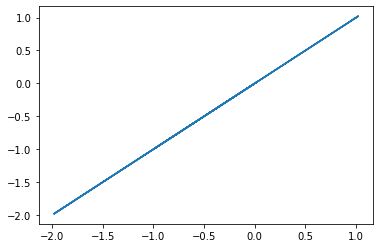

In [34]:
plt.plot(data[:,0], ev_data[:,0])